In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings


In [3]:
# read_csv, read_excel for multiple sheet table.
# dfExcel = pd.read_excel(r'\Data\istambul_stock_exchange.xlsx', sheet_name = 'Data')
# dfExcel.head(5)


In [4]:
# Setting for pandas view
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth', 0)

In [3]:
air_passenger = pd.read_csv('AirPassengers.csv') # Importing data from csv file. It can be on reading sql as well or webdata using different command

In [83]:
air_passenger.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [7]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
dates = pd.date_range(start='1949-01-01',end='1960-01-01',freq='H')


In [8]:
dates

DatetimeIndex(['1949-01-01 00:00:00', '1949-01-01 01:00:00',
               '1949-01-01 02:00:00', '1949-01-01 03:00:00',
               '1949-01-01 04:00:00', '1949-01-01 05:00:00',
               '1949-01-01 06:00:00', '1949-01-01 07:00:00',
               '1949-01-01 08:00:00', '1949-01-01 09:00:00',
               ...
               '1959-12-31 15:00:00', '1959-12-31 16:00:00',
               '1959-12-31 17:00:00', '1959-12-31 18:00:00',
               '1959-12-31 19:00:00', '1959-12-31 20:00:00',
               '1959-12-31 21:00:00', '1959-12-31 22:00:00',
               '1959-12-31 23:00:00', '1960-01-01 00:00:00'],
              dtype='datetime64[ns]', length=96409, freq='H')

In [86]:
air_passenger['Month'] = dates.month
air_passenger['Year'] = dates.year
air_passenger['Day'] = dates.day

In [16]:
air_passenger.dtypes

Month          int64
#Passengers    int64
Year           int64
Day            int64
dtype: object

In [88]:
import calendar
air_passenger['Month'] = air_passenger['Month'].apply(lambda x: calendar.month_abbr[x])
air_passenger.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
air_passenger = air_passenger[['Month','Year','Passengers']]

In [89]:
air_passenger['Date'] = dates
air_passenger.set_index('Date',inplace=True) # Important to run through this to set as row header

In [95]:
# Filtering technique 1940 - 1960 
air_passenger[(air_passenger['Year'] >= 1955) & (air_passenger['Year'] <= 1957) & (air_passenger['Passengers']>250)]

,Month,Year,Passengers
Date,,,
1955-03-31,Mar,1955,267
1955-04-30,Apr,1955,269
1955-05-31,May,1955,270
1955-06-30,Jun,1955,315
1955-07-31,Jul,1955,364
1955-08-31,Aug,1955,347
1955-09-30,Sep,1955,312
1955-10-31,Oct,1955,274
1955-12-31,Dec,1955,278


In [98]:
air_passenger.groupby('Year')['Passengers'].agg('max')

Year
1949    148
1950    170
1951    199
1952    242
1953    272
1954    302
1955    364
1956    413
1957    467
1958    505
1959    559
1960    622
Name: Passengers, dtype: int64

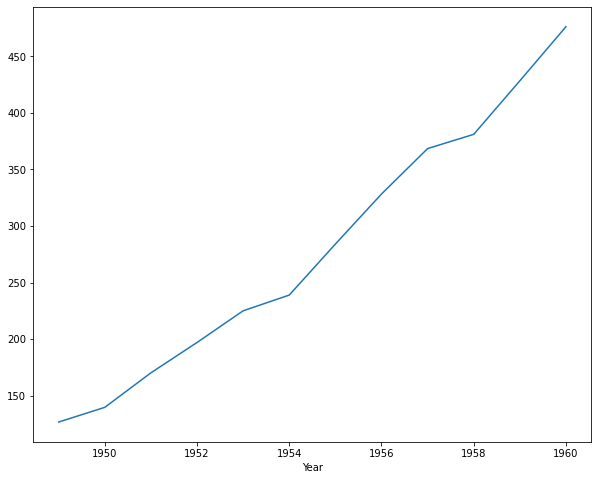

In [99]:
# By year 
plt.figure(figsize=(10,8))
air_passenger.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

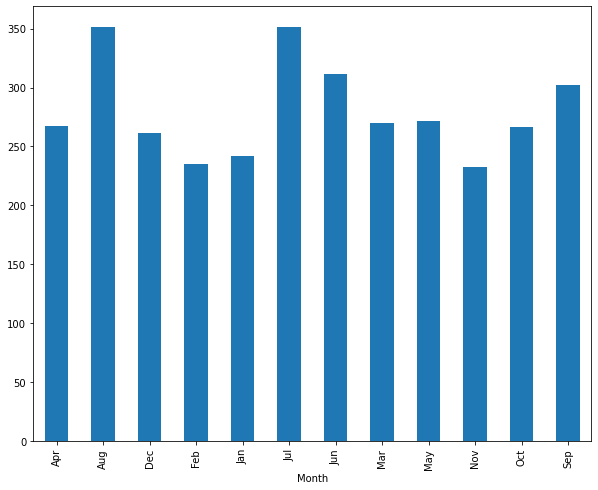

In [26]:
# By months
plt.figure(figsize=(10,8))
air_passenger.groupby('Month')['Passengers'].mean().plot(kind='bar')
plt.show()

In [27]:
passengers_count = air_passenger['Passengers']


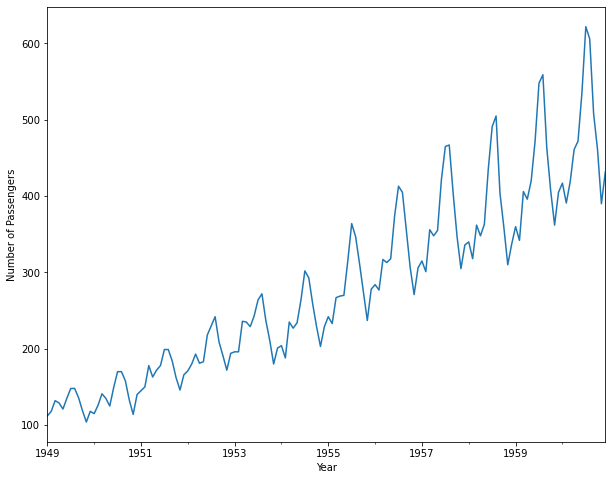

In [28]:
plt.figure(figsize=(10,8))
passengers_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [31]:
decompose = sm.tsa.seasonal_decompose(passengers_count,model='multiplicative',extrapolate_trend=8)

Text(0.5, 0.98, 'Decomposition of Time Series')

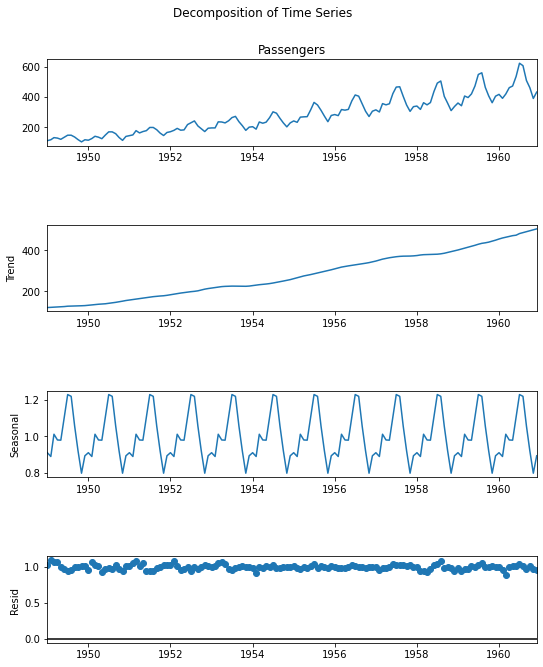

In [32]:
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')

Time series aggregation - Session 2

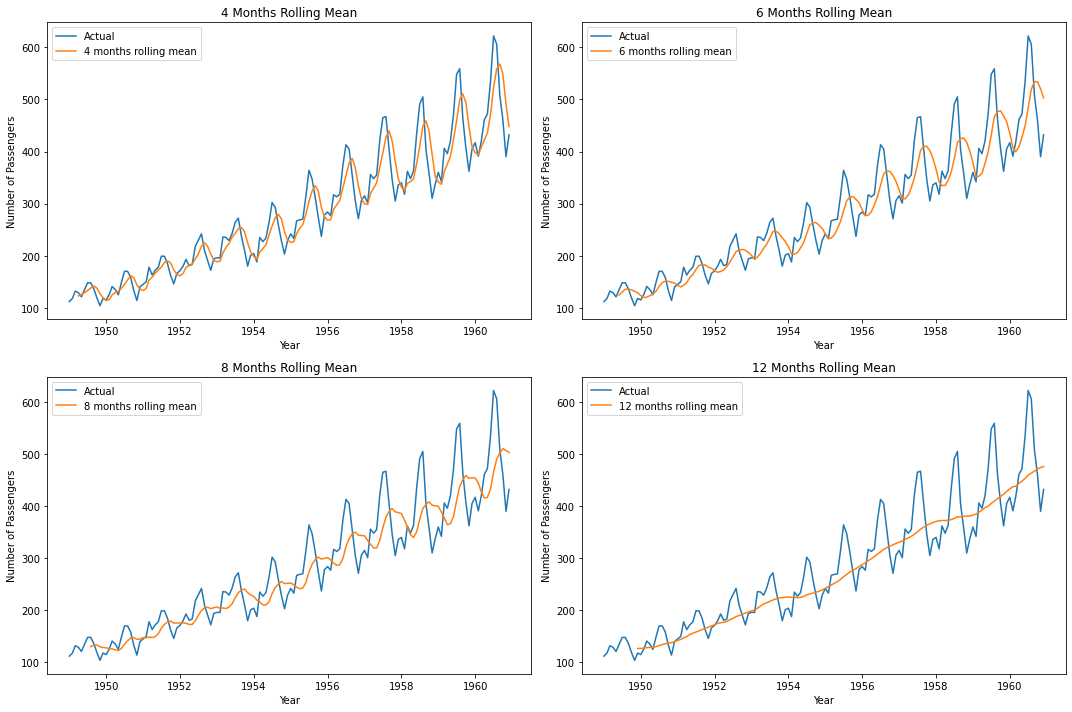

In [35]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(air_passenger.index,passengers_count,label='Actual')
axes[0][0].plot(air_passenger.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(air_passenger.index,passengers_count,label='Actual')
axes[0][1].plot(air_passenger.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(air_passenger.index,passengers_count,label='Actual')
axes[1][0].plot(air_passenger.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(air_passenger.index,passengers_count,label='Actual')
axes[1][1].plot(air_passenger.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()